# 1. Caso de Estudio de Bank Marketing Dataset

## 1.1. Definición de preguntas y problemas

Este proyecto ha sido seleccionado de la plataforma UCI Machine Learning Repository, la cual define el problema que se debe resolver o las preguntas que se deben formular mientras proporcionan los conjuntos de datos para entrenar su modelo de ciencia de datos y probar los resultados del modelo.

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para evaluar si el producto (depósito a plazo bancario) sería suscrito ("sí") o no ("no").

## 1.2. Objetivos del proyecto

El objetivo del proyectos es practicar lo aprendido durante el curso de Intaligencia Artificial poniendo en práctica las diferentes librerias que nos aporta Python a la hora de resolver este tipo de problemas.

Se trata de ir siguiendo los pasos que normalmente sigue un proyecto de este tipo:

1. Obtención, análisis y pre-procesamiento de los datos.
2. Creación del modelo.
3. Entrenamiento del modelo.
4. Predicción.
5. Evaluación del modelo.
6. Análisis de los resultados obtenidos en la evaluación.

En el caso del dataset de Bank Marketing hay varios valores faltantes en algunos atributos categóricos, todos codificados con la etiqueta "unknown". Estos valores faltantes pueden tratarse como una posible etiqueta de clase o manejarse mediante técnicas de eliminación o imputación.

In [3]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('./bank.csv', sep=";")

In [5]:
print(df.shape)
print('_'*20)
df.info()
print('_'*20)
print(df.describe(include='object'))
print('_'*20)
df.isnull().sum()

(41188, 21)
____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [7]:
print(f"Número total de '999' en la columna 'pdays': {(df['pdays'] == 999).sum()}")

Número total de '999' en la columna 'pdays': 39673


In [8]:
print(f"Valores únicos de la columna 'emp.var.rate': {df['emp.var.rate'].unique()}")
print(f"Valores únicos de la columna 'cons.price.idx': {df['cons.price.idx'].unique()}")
print(f"Valores únicos de la columna 'cons.conf.idx': {df['cons.conf.idx'].unique()}")
print(f"Valores únicos de la columna 'euribor3m': {df['euribor3m'].unique()}")
print(f"Valores únicos de la columna 'nr.employed': {df['nr.employed'].unique()}")

Valores únicos de la columna 'emp.var.rate': [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Valores únicos de la columna 'cons.price.idx': [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
Valores únicos de la columna 'cons.conf.idx': [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
Valores únicos de la columna 'euribor3m': [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65

In [9]:
# Revisamos que columnas tienen valores 'unknown' 
columnas_con_unknown = [col for col in df.columns if (df[col] == "unknown").any()]
print(columnas_con_unknown)

['job', 'marital', 'education', 'default', 'housing', 'loan']


Procentaje de 'unknown' en la columna 'job': 330 (0.80%)
Procentaje de 'unknown' en la columna 'marital': 80 (0.19%)
Procentaje de 'unknown' en la columna 'education': 1731 (4.20%)
Procentaje de 'unknown' en la columna 'default': 8597 (20.87%)
Procentaje de 'unknown' en la columna 'housing': 990 (2.40%)
Procentaje de 'unknown' en la columna 'loan': 990 (2.40%)


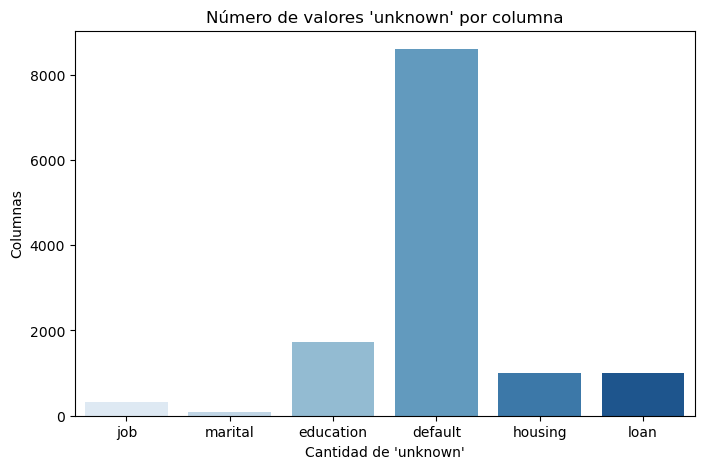

In [10]:
# Calculamos el número y el porcentaje de 'unkown' de esas columnas
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columns:
    count_unknown = (df[col] == 'unknown').sum()
    porcentaje = (count_unknown / len(df)) * 100  # Cálculo del porcentaje
    print(f"Procentaje de 'unknown' en la columna '{col}': {count_unknown} ({porcentaje:.2f}%)")

# Visualizamos los datos

# Calcular valores únicos de 'unknown'
unknown_counts = [ (df[col] == 'unknown').sum() for col in columns ]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=columns, y=unknown_counts, hue=columns, palette="Blues", legend=False)

plt.xlabel("Cantidad de 'unknown'")
plt.ylabel("Columnas")
plt.title("Número de valores 'unknown' por columna")
plt.show()

In [11]:
# Capitalizamos los nombres de las columnas
df.columns = [col.capitalize() for col in df.columns]
df

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
# Eliminamos espacios si los hay y pasamos los valores a minúsculas para luego mapearlos
df['Y'] = df['Y'].str.strip().str.lower().map({'no': 0, 'yes': 1})
df

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [13]:
# Hacemos rangos de edad y los mapeamos con valores de 0 a 4
labels = [0, 1, 2, 3, 4]
df['Age'] = pd.cut(df['Age'], bins=5, labels=labels, include_lowest=True)
df['Age'] = df['Age'].astype(int)
df

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
0,2,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,2,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,1,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,1,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,2,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,2,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,1,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [14]:
# Sustituimos los valores 'unknown' de estas columnas por su moda ya que anteriormente vimos que no tenian demasiados valores de ese tipo
for col in ['Job', 'Marital', 'Housing', 'Loan']:
    moda = df[col].mode()[0]
    df[col] = df[col].str.lower().replace('unknown', moda)

# Comprobamos que la sustitución ha funcionado
for col in ['Job', 'Marital', 'Housing', 'Loan']:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en Job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Valores únicos en Marital: ['married' 'single' 'divorced']
Valores únicos en Housing: ['no' 'yes']
Valores únicos en Loan: ['no' 'yes']


In [15]:
# Aplicamos one-hot-encoding a las columnas de job y marital
encoder = OneHotEncoder(drop='first', sparse_output=False)
columnas_categoricas = ['Job', 'Marital']
encoded_values = encoder.fit_transform(df[columnas_categoricas])
df_encoded= pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(columnas_categoricas))
df = pd.concat([df.drop(columns=columnas_categoricas), df_encoded], axis=1)
df.head()

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,basic.4y,no,no,no,telephone,may,mon,261,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,high.school,unknown,no,no,telephone,may,mon,149,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,high.school,no,yes,no,telephone,may,mon,226,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,basic.6y,no,no,no,telephone,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,high.school,no,no,yes,telephone,may,mon,307,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Hacemos rangos en Education 
education_map = {
    'basic.4y': 'Primary',
    'basic.6y': 'Primary',
    'basic.9y': 'Primary',
    'high.school': 'Secondary',
    'professional.course': 'Secondary',
    'university.degree': 'Tertiary',
    'illiterate': 'No Education',
    'unknown': 'Unknown'
}
df['Education'] = df['Education'].replace(education_map)
df

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,Primary,no,no,no,telephone,may,mon,261,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Secondary,unknown,no,no,telephone,may,mon,149,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,Secondary,no,yes,no,telephone,may,mon,226,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,Primary,no,no,no,telephone,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,Secondary,no,no,yes,telephone,may,mon,307,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,Secondary,no,yes,no,cellular,nov,fri,334,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,1,Secondary,no,no,no,cellular,nov,fri,383,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,2,Tertiary,no,yes,no,cellular,nov,fri,189,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,1,Secondary,no,no,no,cellular,nov,fri,442,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
# Mapeamos la columna 'Education'
df['Education'] = df['Education'].str.strip().str.lower().map({
    'unknown': 0, 
    'no education': 1, 
    'primary': 2, 
    'secondary': 3, 
    'tertiary': 4
})
df['Education'].value_counts()

Education
3    14758
2    12513
4    12168
0     1731
1       18
Name: count, dtype: int64

In [18]:
# Mapeamos la columna 'Default'
df['Default'] = df['Default'].str.strip().str.lower().map({'unknown': 0, 'no': 1, 'yes': 2})


In [19]:
# Mapeamos las columnas 'Housing', 'Loan' con 0 => no y 1 => yes
df[['Housing', 'Loan']] = df[['Housing', 'Loan']].replace({'no': 0, 'yes': 1})
df

C:\Users\agust\AppData\Local\Temp\ipykernel_14964\639930396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Housing', 'Loan']] = df[['Housing', 'Loan']].replace({'no': 0, 'yes': 1})


,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,2,1,0,0,telephone,may,mon,261,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0,0,0,telephone,may,mon,149,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,0,telephone,may,mon,226,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1,0,0,telephone,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,1,telephone,may,mon,307,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,3,1,1,0,cellular,nov,fri,334,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,1,3,1,0,0,cellular,nov,fri,383,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,2,4,1,1,0,cellular,nov,fri,189,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,1,3,1,0,0,cellular,nov,fri,442,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
# Mapeamos 'Contact'
df['Contact'] = df['Contact'].str.strip().str.lower().map({'cellular': 1, 'telephone': 0})
df

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,2,1,0,0,0,may,mon,261,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0,0,0,0,may,mon,149,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,0,0,may,mon,226,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1,0,0,0,may,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,1,0,may,mon,307,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,3,1,1,0,1,nov,fri,334,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,1,3,1,0,0,1,nov,fri,383,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,2,4,1,1,0,1,nov,fri,189,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,1,3,1,0,0,1,nov,fri,442,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
# Mostramos los valores que contiene 'Month'
print(f"Valores únicos en 'Month': {df['Month'].str.lower().unique()}")

Valores únicos en 'Month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [22]:
# Mapeamos los valores de los meses por orden
df['Month'] = df['Month'].str.strip().str.lower().map({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})
df.head()

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,2,1,0,0,0,5,mon,261,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0,0,0,0,5,mon,149,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,0,0,5,mon,226,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1,0,0,0,5,mon,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,1,0,5,mon,307,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# Mapeamos también la columna 'Day_of_week'
df['Day_of_week'] = df['Day_of_week'].str.strip().str.lower().map({
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
df.head()

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,2,1,0,0,0,5,1,261,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0,0,0,0,5,1,149,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,0,0,5,1,226,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1,0,0,0,5,1,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,1,0,5,1,307,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Pendiente eliminar 'Duration'
df = df.drop(columns=['Duration'])
df.tail()

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Campaign,Pdays,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
41183,3,3,1,1,0,1,11,5,1,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,1,3,1,0,0,1,11,5,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,2,4,1,1,0,1,11,5,2,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,1,3,1,0,0,1,11,5,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41187,3,3,1,1,0,1,11,5,3,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# En la columna 'Campaign' no realizamos ningún pre-procesado en un primer momento
df['Campaign'].value_counts()

Campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [26]:
# Solamente hacemos que los datos sean numéricos
#df['Pdays'] = df['Pdays'].astype(int)

# Hacemos rangos en 'Pdays'
labels = [0, 1, 2, 3]
df['Pdays'] = pd.cut(df['Pdays'], bins=4, labels=labels, include_lowest=True)

# Convertir Pdays a numérico después de aplicar pd.cut()
df['Pdays'] = df['Pdays'].astype(int)

# Aplicar la moda a los campos NaN
df['Pdays'] = df['Pdays'].fillna(df['Pdays'].mode()[0])

In [27]:
# Mapeamos también la columna 'Poutcome'
df['Poutcome'] = df['Poutcome'].str.strip().str.lower().map({'nonexistent': 0, 'failure': 1, 'success': 2})

# Otra opción sería realizar un one-hot-encoding (no aplica valor hacerlo)
#df = pd.get_dummies(df, columns=['Poutcome'], drop_first=True)

# Convertir todas las columnas booleanas a int
'''df['Poutcome_nonexistent'] = df['Poutcome_nonexistent'].astype(int)
df['Poutcome_success'] = df['Poutcome_success'].astype(int)'''
df

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Campaign,Pdays,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,2,1,0,0,0,5,1,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0,0,0,0,5,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,0,0,5,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1,0,0,0,5,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,1,0,5,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,3,1,1,0,1,11,5,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,1,3,1,0,0,1,11,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,2,4,1,1,0,1,11,5,2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,1,3,1,0,0,1,11,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [28]:
print(df[['Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed']].describe())

       Emp.var.rate  Cons.price.idx  Cons.conf.idx     Euribor3m   Nr.employed
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911
std        1.570960        0.578840       4.628198      1.734447     72.251528
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000
max        1.400000       94.767000     -26.900000      5.045000   5228.100000


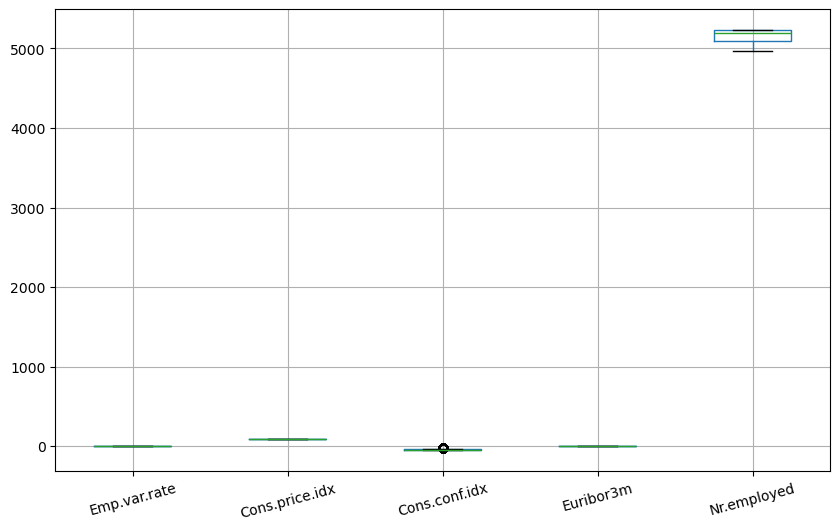

In [29]:
df[['Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed']].boxplot(figsize=(10,6))
plt.xticks(rotation=15)
plt.show()

In [30]:
#Usamos Estandarización (Z-score scaling) para que todas las variables tengan media 0 y desviación estándar 1
'''scaler = StandardScaler()
df[['Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 
    'Euribor3m', 'Nr.employed']] = scaler.fit_transform(df[['Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx',
                                                            'Euribor3m', 'Nr.employed']])
df'''

,Age,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Campaign,Pdays,...,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single
0,2,2,1,0,0,0,5,1,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0,0,0,0,5,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,0,0,5,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,1,0,0,0,5,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,1,0,5,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,3,1,1,0,1,11,5,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,1,3,1,0,0,1,11,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,2,4,1,1,0,1,11,5,2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,1,3,1,0,0,1,11,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                41188 non-null  int32  
 1   Education          41188 non-null  int64  
 2   Default            41188 non-null  int64  
 3   Housing            41188 non-null  int64  
 4   Loan               41188 non-null  int64  
 5   Contact            41188 non-null  int64  
 6   Month              41188 non-null  int64  
 7   Day_of_week        41188 non-null  int64  
 8   Campaign           41188 non-null  int64  
 9   Pdays              41188 non-null  int32  
 10  Previous           41188 non-null  int64  
 11  Poutcome           41188 non-null  int64  
 12  Emp.var.rate       41188 non-null  float64
 13  Cons.price.idx     41188 non-null  float64
 14  Cons.conf.idx      41188 non-null  float64
 15  Euribor3m          41188 non-null  float64
 16  Nr.employed        411

In [32]:
df[['Age', 'Y']].groupby('Age', as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Y
0,0,0.133600
1,1,0.086116
2,2,0.118209
3,3,0.459615
4,4,0.515152


In [33]:
df[['Job_housemaid', 'Y']].groupby('Job_housemaid', as_index=False).mean().sort_values(by='Job_housemaid', ascending=True)

,Job_housemaid,Y
0,0.0,0.112988
1,1.0,0.100000


In [34]:
df[['Job_management', 'Y']].groupby('Job_management', as_index=False).mean().sort_values(by='Job_management', ascending=True)

,Job_management,Y
0,0.0,0.112691
1,1.0,0.112175


In [35]:
df[['Job_retired', 'Y']].groupby('Job_retired', as_index=False).mean().sort_values(by='Job_retired', ascending=True)

,Job_retired,Y
0,0.0,0.106567
1,1.0,0.252326


In [36]:
df[['Job_self-employed', 'Y']].groupby('Job_self-employed', as_index=False).mean().sort_values(by='Job_self-employed', ascending=True)

,Job_self-employed,Y
0,0.0,0.112933
1,1.0,0.104856


In [37]:
df[['Job_services', 'Y']].groupby('Job_services', as_index=False).mean().sort_values(by='Job_services', ascending=True)

,Job_services,Y
0,0.0,0.115989
1,1.0,0.081381


In [38]:
df[['Job_student', 'Y']].groupby('Job_student', as_index=False).mean().sort_values(by='Job_student', ascending=True)

,Job_student,Y
0,0.0,0.108278
1,1.0,0.314286


In [39]:
df[['Job_technician', 'Y']].groupby('Job_technician', as_index=False).mean().sort_values(by='Job_technician', ascending=True)

,Job_technician,Y
0,0.0,0.113514
1,1.0,0.108260


In [40]:
df[['Job_unemployed', 'Y']].groupby('Job_unemployed', as_index=False).mean().sort_values(by='Job_unemployed', ascending=True)

,Job_unemployed,Y
0,0.0,0.111913
1,1.0,0.142012


In [41]:
df[['Marital_married', 'Y']].groupby('Marital_married', as_index=False).mean().sort_values(by='Marital_married', ascending=True)
#df[['Marital', 'Y']].groupby('Marital', as_index=False).mean().sort_values(by='Marital', ascending=True)

,Marital_married,Y
0,0.0,0.129543
1,1.0,0.101727


In [42]:
df[['Marital_single', 'Y']].groupby('Marital_single', as_index=False).mean().sort_values(by='Marital_single', ascending=True)

,Marital_single,Y
0,0.0,0.101958
1,1.0,0.140041


In [43]:
df[['Education', 'Y']].groupby('Education', as_index=False).mean().sort_values(by='Education', ascending=True)

,Education,Y
0,0,0.145003
1,1,0.222222
2,2,0.087029
3,3,0.110178
4,4,0.137245


In [44]:
df[['Default', 'Y']].groupby('Default', as_index=False).mean().sort_values(by='Default', ascending=True)

,Default,Y
0,0,0.05153
1,1,0.12879
2,2,0.00000


In [45]:
df[['Housing', 'Y']].groupby('Housing', as_index=False).mean().sort_values(by='Housing', ascending=True)

,Housing,Y
0,0,0.108796
1,1,0.115838


In [46]:
df[['Loan', 'Y']].groupby('Loan', as_index=False).mean().sort_values(by='Loan', ascending=True)

,Loan,Y
0,0,0.113251
1,1,0.109315


In [47]:
df[['Contact', 'Y']].groupby('Contact', as_index=False).mean().sort_values(by='Contact', ascending=True)

,Contact,Y
0,0,0.052313
1,1,0.147376


In [48]:
df[['Month', 'Y']].groupby('Month', as_index=False).mean().sort_values(by='Month', ascending=True)

,Month,Y
0,3,0.505495
1,4,0.204787
2,5,0.064347
3,6,0.105115
4,7,0.090466
5,8,0.106021
6,9,0.449123
7,10,0.438719
8,11,0.101439
9,12,0.489011


In [49]:
df[['Day_of_week', 'Y']].groupby('Day_of_week', as_index=False).mean().sort_values(by='Day_of_week', ascending=True)

,Day_of_week,Y
0,1,0.099483
1,2,0.117800
2,3,0.116671
3,4,0.121188
4,5,0.108087


In [50]:
df[['Campaign', 'Y']].groupby('Campaign', as_index=False).mean().sort_values(by='Campaign', ascending=True)

,Campaign,Y
0,1,0.130371
1,2,0.114570
2,3,0.107471
3,4,0.093927
4,5,0.075047
5,6,0.076609
6,7,0.060413
7,8,0.042500
8,9,0.060071
9,10,0.053333


In [51]:
df[['Pdays', 'Y']].groupby('Pdays', as_index=False).mean().sort_values(by='Pdays', ascending=True)

,Pdays,Y
0,0,0.638284
1,3,0.092582


In [52]:
df[['Previous', 'Y']].groupby('Previous', as_index=False).mean().sort_values(by='Previous', ascending=True)

,Previous,Y
0,0,0.088322
1,1,0.212015
2,2,0.464191
3,3,0.592593
4,4,0.542857
5,5,0.722222
6,6,0.600000
7,7,0.000000


In [53]:
df[['Poutcome', 'Y']].groupby('Poutcome', as_index=False).mean().sort_values(by='Poutcome', ascending=True)

,Poutcome,Y
0,0,0.088322
1,1,0.142286
2,2,0.651129


In [54]:
df[['Emp.var.rate', 'Y']].groupby('Emp.var.rate', as_index=False).mean().sort_values(by='Emp.var.rate', ascending=True)

,Emp.var.rate,Y
0,-2.216433,0.423903
1,-1.961809,0.511628
2,-1.898153,0.357186
3,-1.197935,0.159081
4,-1.134279,0.521345
5,-0.752343,0.474016
6,-0.179437,0.100000
7,-0.115781,0.062992
8,0.648092,0.030916
9,0.839061,0.053345


In [55]:
df[['Cons.price.idx', 'Y']].groupby('Cons.price.idx', as_index=False).mean().sort_values(by='Cons.price.idx', ascending=True)

,Cons.price.idx,Y
0,-2.374889,0.342857
1,-2.067374,0.397004
2,-1.977538,0.402685
3,-1.911889,0.370787
4,-1.600918,0.470588
5,-1.490351,0.511628
6,-1.416064,0.100000
7,-1.265761,0.446809
8,-1.179380,0.090438
9,-1.058448,0.369231


In [56]:
df[['Cons.conf.idx', 'Y']].groupby('Cons.conf.idx', as_index=False).mean().sort_values(by='Cons.conf.idx', ascending=True)

,Cons.conf.idx,Y
0,-2.224953,0.453125
1,-2.052098,0.446809
2,-1.944063,0.455882
3,-1.425496,0.179821
4,-1.231034,0.090438
5,-1.166213,0.100000
6,-0.474791,0.060883
7,-0.323542,0.052544
8,-0.280328,0.042981
9,-0.064259,0.369231


In [57]:
df[['Euribor3m', 'Y']].groupby('Euribor3m', as_index=False).mean().sort_values(by='Euribor3m', ascending=True)

,Euribor3m,Y
0,-1.722351,0.750000
1,-1.721774,0.511628
2,-1.721198,0.214286
3,-1.720621,0.833333
4,-1.720045,0.714286
...,...,...
311,0.775881,0.051322
312,0.776458,0.057460
313,0.777611,0.023256
314,0.794908,0.428571


In [58]:
df[['Nr.employed', 'Y']].groupby('Nr.employed', as_index=False).mean().sort_values(by='Nr.employed', ascending=True)

,Nr.employed,Y
0,-2.815697,0.474016
1,-2.428157,0.521345
2,-2.191481,0.567692
3,-2.069683,0.423903
4,-1.986638,0.511628
5,-1.257233,0.357186
6,-0.940281,0.127959
7,0.128222,0.100000
8,0.331680,0.030916
9,0.398115,0.062992


In [59]:
# Dividimos el dataset en 'train' y 'test'
X = df.drop(columns=['Y']) # Eliminamos en dataset la columna 'target'
y = df['Y'] # Indicamos cuales son los resultados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (32950, 29), Test: (8238, 29)


In [60]:
# Regresión Logística (LogisticRegression)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
logistic_regression = LogisticRegression(max_iter=5000, solver='lbfgs')


# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(logistic_regression, X_train, y_train, cv=kf, scoring="f1_macro")

# Aplicar SMOTE primero para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:", Counter(y_train_resampled))

# Aplicar StandardScaler después de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformamos X_test, no lo ajustamos con fit()

# Entrenamos el modelo con todo X_train
logistic_regression.fit(X_train_scaled, y_train_resampled)

# Predecimos con el modelo entrenado en X_test
y_predict = logistic_regression.predict(X_test_scaled)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuación F1 promedio (macro)
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos las métricas
metrica_logistic_regression = round(f1 * 100, 2)
print(" >>> Metrica final Logistic Regression:", metrica_logistic_regression)

# Resultados de Cross-Validation
metrica_scores_logistic_regression = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_logistic_regression)
######################################################################################################


Distribución después de SMOTE: Counter({0: 29245, 1: 29245})
 > Matriz de confusión:
[[5887 1416]
 [ 369  566]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7303
           1       0.29      0.61      0.39       935

    accuracy                           0.78      8238
   macro avg       0.61      0.71      0.63      8238
weighted avg       0.87      0.78      0.81      8238

 > F1 Score promedio: 0.6282115291256337
 >>> Metrica final Logistic Regression: 62.82
Metricas cross_validation (F1-macro): [0.64702156 0.65292394 0.63875798 0.63791316 0.63269233]
Media de cross_validation (F1-macro): 64.19


In [61]:
# Árbol de Decisión (DecisionTreeClassifier)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
decision_tree = DecisionTreeClassifier()

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(decision_tree, X_train, y_train, cv=kf, scoring="f1_macro")

# Entrenamos el modelo
decision_tree.fit(X_train, y_train)

# Predecimos con el modelo
y_predict = decision_tree.predict(X_test)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_decision_tree = round(f1 * 100, 2)
print(" >>> Metrica final Decision Tree:", metrica_decision_tree)

# Resultados de Cross-Validation
metrica_scores_decision_tree = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_decision_tree)
######################################################################################################

 > Matriz de confusión:
[[6647  656]
 [ 628  307]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7303
           1       0.32      0.33      0.32       935

    accuracy                           0.84      8238
   macro avg       0.62      0.62      0.62      8238
weighted avg       0.85      0.84      0.85      8238

 > F1 Score promedio: 0.6177102468737264
 >>> Metrica final Decision Tree: 61.77
Metricas cross_validation (F1-macro): [0.61705632 0.62911091 0.62173546 0.63100708 0.63219859]
Media de cross_validation (F1-macro): 62.62


In [62]:
# Random Forest (RandomForestClassifier)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
random_forest = RandomForestClassifier()

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(random_forest, X_train, y_train, cv=kf, scoring="f1_macro")

# Entrenamos el modelo
random_forest.fit(X_train, y_train)

# Predecimos con el modelo
y_predict = random_forest.predict(X_test)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_random_forest = round(f1 * 100, 2)
print(" >>> Metrica final Random Forest:", metrica_random_forest)

# Resultados de Cross-Validation
metrica_scores_random_forest = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_random_forest)
######################################################################################################

 > Matriz de confusión:
[[7021  282]
 [ 671  264]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7303
           1       0.48      0.28      0.36       935

    accuracy                           0.88      8238
   macro avg       0.70      0.62      0.65      8238
weighted avg       0.86      0.88      0.87      8238

 > F1 Score promedio: 0.6464806747421321
 >>> Metrica final Random Forest: 64.65
Metricas cross_validation (F1-macro): [0.66181281 0.67133191 0.65540442 0.67013062 0.65214298]
Media de cross_validation (F1-macro): 66.22


In [63]:
# Nearest Neighbors (KNN) (KNeighborsClassifier)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
knn = KNeighborsClassifier()

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring="f1_macro")

# Aplicar SMOTE primero para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:", Counter(y_train_resampled))

# Aplicar StandardScaler después de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformamos X_test, no lo ajustamos con fit()

# Entrenamos el modelo
knn.fit(X_train_scaled, y_train_resampled)

# Predecimos con el modelo
y_predict = knn.predict(X_test_scaled)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_knn = round(f1 * 100, 2)
print(" >>> Metrica final KNN:", metrica_knn)

# Resultados de Cross-Validation
metrica_scores_knn = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_knn)
######################################################################################################

Distribución después de SMOTE: Counter({0: 29245, 1: 29245})
 > Matriz de confusión:
[[6100 1203]
 [ 465  470]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7303
           1       0.28      0.50      0.36       935

    accuracy                           0.80      8238
   macro avg       0.61      0.67      0.62      8238
weighted avg       0.86      0.80      0.82      8238

 > F1 Score promedio: 0.6200762757002483
 >>> Metrica final KNN: 62.01
Metricas cross_validation (F1-macro): [0.65977143 0.67373616 0.65589753 0.65827605 0.64379968]
Media de cross_validation (F1-macro): 65.83


In [64]:
# Support Vector Machine (SVM) (SVC)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
svc = SVC()

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(svc, X_train, y_train, cv=kf, scoring="f1_macro")

# Aplicar SMOTE primero para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:", Counter(y_train_resampled))

# Aplicar StandardScaler después de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformamos X_test, no lo ajustamos con fit()

# Entrenamos el modelo
svc.fit(X_train_scaled, y_train_resampled)

# Predecimos con el modelo
y_predict = svc.predict(X_test_scaled)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_svc = round(f1 * 100, 2)
print(" >>> Metrica final SVC:", metrica_svc)

# Resultados de Cross-Validation
metrica_scores_svc = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_svc)
######################################################################################################

Distribución después de SMOTE: Counter({0: 29245, 1: 29245})
 > Matriz de confusión:
[[6588  715]
 [ 462  473]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7303
           1       0.40      0.51      0.45       935

    accuracy                           0.86      8238
   macro avg       0.67      0.70      0.68      8238
weighted avg       0.87      0.86      0.86      8238

 > F1 Score promedio: 0.6817960463213085
 >>> Metrica final SVC: 68.18
Metricas cross_validation (F1-macro): [0.63416017 0.64032028 0.63123142 0.62275134 0.62065224]
Media de cross_validation (F1-macro): 62.98


In [65]:
# Naive Bayes Gaussiano (GaussianNB)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
gaussian = GaussianNB()

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(gaussian, X_train, y_train, cv=kf, scoring="f1_macro")

# Entrenamos el modelo
gaussian.fit(X_train, y_train)

# Predecimos con el modelo
y_predict = gaussian.predict(X_test)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_gaussian = round(f1 * 100, 2)
print(" >>> Metrica final GaussianNB:", metrica_gaussian)

# Resultados de Cross-Validation
metrica_scores_gaussian = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_gaussian)
######################################################################################################

 > Matriz de confusión:
[[6344  959]
 [ 476  459]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7303
           1       0.32      0.49      0.39       935

    accuracy                           0.83      8238
   macro avg       0.63      0.68      0.64      8238
weighted avg       0.86      0.83      0.84      8238

 > F1 Score promedio: 0.6442664696322478
 >>> Metrica final GaussianNB: 64.43
Metricas cross_validation (F1-macro): [0.64699189 0.64929933 0.64465742 0.63709567 0.64185679]
Media de cross_validation (F1-macro): 64.4


In [66]:
# Perceptrón (Perceptron)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
print("Distribución después de SMOTE:", Counter(y_train_resampled))

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Perceptrón
perceptron = Perceptron(max_iter=5000, tol=1e-4, class_weight='balanced', random_state=42)

# Aplicar Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(perceptron, X_train_scaled, y_train_resampled, cv=kf, scoring="f1_macro")

# Entrenar el modelo
perceptron.fit(X_train_scaled, y_train_resampled)

# Predecir con el modelo
y_predict = perceptron.predict(X_test_scaled)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_perceptron = round(f1 * 100, 2)
print(" >>> Metrica final Perceptron:", metrica_perceptron)

# Resultados de Cross-Validation
metrica_scores_perceptron = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_perceptron)
######################################################################################################

Distribución después de SMOTE: Counter({0: 29245, 1: 29245})
 > Matriz de confusión:
[[5052 2251]
 [ 325  610]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      7303
           1       0.21      0.65      0.32       935

    accuracy                           0.69      8238
   macro avg       0.58      0.67      0.56      8238
weighted avg       0.86      0.69      0.74      8238

 > F1 Score promedio: 0.5591181818484009
 >>> Metrica final Perceptron: 55.91
Metricas cross_validation (F1-macro): [0.6887501  0.55650814 0.66440861 0.64680299 0.71450343]
Media de cross_validation (F1-macro): 65.42


In [67]:
# Regresión Ridge (Ridge)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
ridge = RidgeClassifier()

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring="f1_macro")

# Entrenamos el modelo
ridge.fit(X_train, y_train)

# Predecimos con el modelo
y_predict = ridge.predict(X_test)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_ridge = round(f1 * 100, 2)
print(" >>> Metrica final Ridge:", metrica_ridge)

# Resultados de Cross-Validation
metrica_scores_ridge = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_ridge)
######################################################################################################

 > Matriz de confusión:
[[7217   86]
 [ 759  176]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.67      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238

 > F1 Score promedio: 0.6193819190295262
 >>> Metrica final Ridge: 61.94
Metricas cross_validation (F1-macro): [0.62801832 0.63297485 0.62462311 0.62003099 0.61512407]
Media de cross_validation (F1-macro): 62.42


In [68]:
# Red Neuronal (MLP - Multi-layer Perceptron) (MLPClassifier)

# Definir Cross-Validation con StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo
mlp = MLPClassifier(max_iter=500)

# Aplicamos Cross-Validation antes de entrenar con todo el dataset
scores = cross_val_score(mlp, X_train, y_train, cv=kf, scoring="f1_macro")

# Aplicar SMOTE primero para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:", Counter(y_train_resampled))

# Aplicar StandardScaler después de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformamos X_test, no lo ajustamos con fit()

# Entrenamos el modelo
mlp.fit(X_train_scaled, y_train_resampled)

# Predicimos con el modelo
y_predict = mlp.predict(X_test_scaled)

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predict)
print(" > Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
report = classification_report(y_test, y_predict)
print(" > Reporte de clasificación:")
print(report)

# Calcula la puntuación F1 por clase (solo para clasificación multiclase)
f1_per_class = f1_score(y_test, y_predict, average=None)
print(" > F1 Score por clase:", f1)
# Calcula la puntuacion F1 promedio
f1 = f1_score(y_test, y_predict, average='macro')
print(" > F1 Score promedio:", f1)

######################################################################################################
# Guardamos una de las metricas (F1 Score) como metrica global para la comparativa final
metrica_mlp = round(f1 * 100, 2)
print(" >>> Metrica final MLP:", metrica_mlp)

# Resultados de Cross-Validation
metrica_scores_mlp = round(scores.mean() * 100, 2)
print("Metricas cross_validation (F1-macro):", scores)
print("Media de cross_validation (F1-macro):", metrica_scores_mlp)
######################################################################################################

Distribución después de SMOTE: Counter({0: 29245, 1: 29245})
 > Matriz de confusión:
[[6572  731]
 [ 564  371]]
 > Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7303
           1       0.34      0.40      0.36       935

    accuracy                           0.84      8238
   macro avg       0.63      0.65      0.64      8238
weighted avg       0.85      0.84      0.85      8238

 > F1 Score por clase: 0.6193819190295262
 > F1 Score promedio: 0.6372867584427342
 >>> Metrica final MLP: 63.73
Metricas cross_validation (F1-macro): [0.66966935 0.67675133 0.66176226 0.65605891 0.6409372 ]
Media de cross_validation (F1-macro): 66.1


In [1080]:
listaNombresModelos = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes',
                      'Perceptron', 'Ridge Classifier', 'MLP']
listaPrecisionModelos = [metrica_logistic_regression, metrica_decision_tree, metrica_random_forest, 
                         metrica_knn, metrica_svc, metrica_gaussian, metrica_perceptron, 
                         metrica_ridge, metrica_mlp]

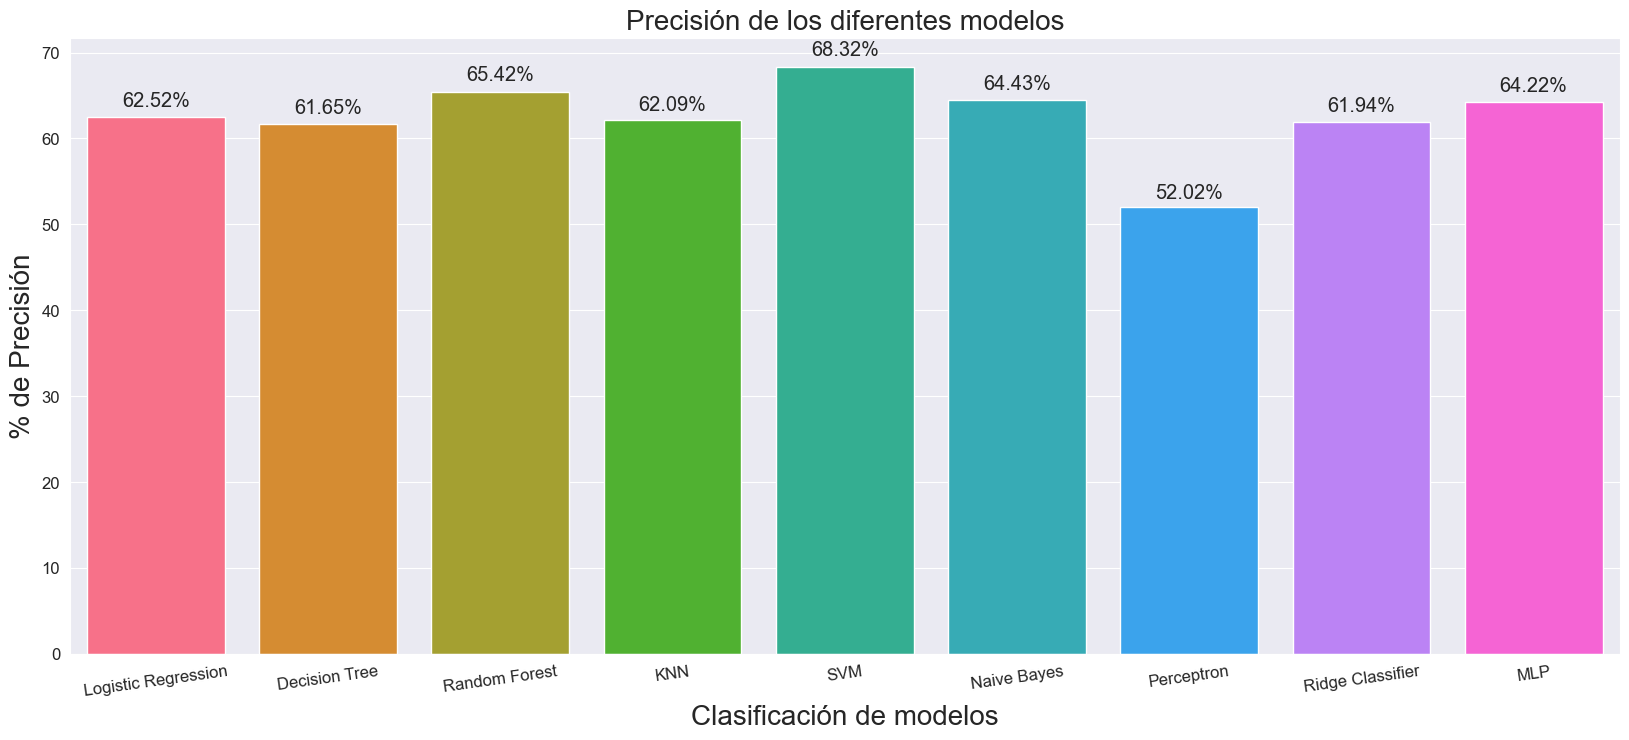

In [1081]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')

ax = sns.barplot(x=listaNombresModelos, y=listaPrecisionModelos, hue=listaNombresModelos, palette="husl", saturation=2.0, legend=False)

# Etiquetas y título
plt.xlabel('Clasificación de modelos', fontsize=20)
plt.ylabel('% de Precisión', fontsize=20)
plt.title('Precisión de los diferentes modelos', fontsize=20)

# Ajuste de etiquetas en los ejes
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=12)

# Agregar anotaciones en las barras
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')

plt.show()

In [1082]:
listaNombresModelos = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes',
                      'Perceptron', 'Ridge Classifier', 'MLP']
listaPrecisionModelos = [metrica_scores_logistic_regression, metrica_scores_decision_tree, metrica_scores_random_forest, 
                         metrica_scores_knn, metrica_scores_svc, metrica_scores_gaussian, metrica_scores_perceptron, 
                         metrica_scores_ridge, metrica_scores_mlp]

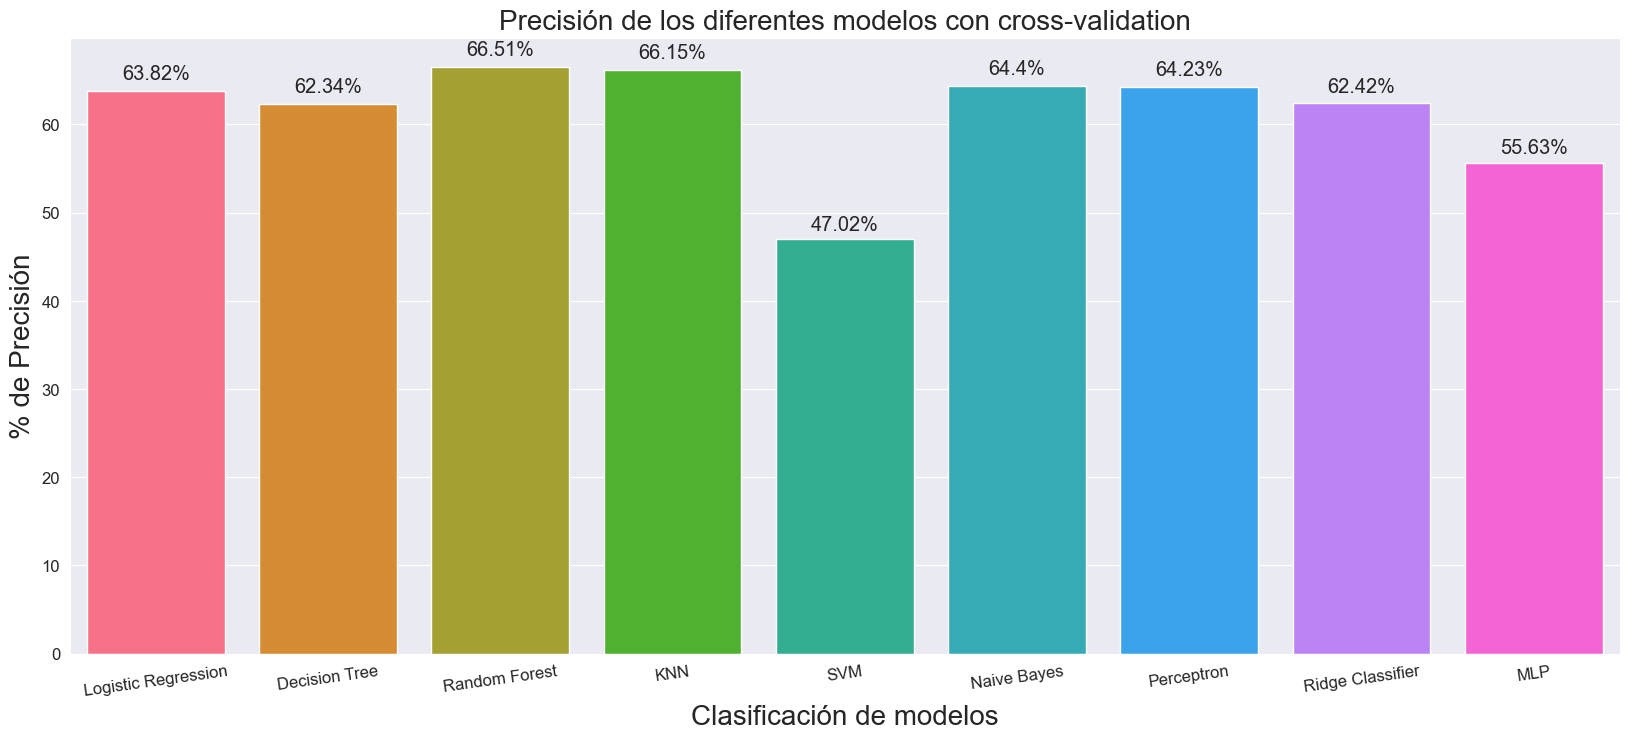

In [1083]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')

ax = sns.barplot(x=listaNombresModelos, y=listaPrecisionModelos, hue=listaNombresModelos, palette="husl", saturation=2.0, legend=False)

# Etiquetas y título
plt.xlabel('Clasificación de modelos', fontsize=20)
plt.ylabel('% de Precisión', fontsize=20)
plt.title('Precisión de los diferentes modelos con cross-validation', fontsize=20)

# Ajuste de etiquetas en los ejes
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=12)

# Agregar anotaciones en las barras
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')

plt.show()